In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers  import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

from tensorflow.keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/dataset/fashion-mnist_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/dataset/fashion-mnist_test.csv')
df = train.copy()
df_test = test.copy()
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Train: ', df.shape)
print('Test: ', df_test.shape)

print(df.label.unique())

Train:  (60000, 785)
Test:  (10000, 785)
[2 9 6 0 3 4 5 8 7 1]


In [ ]:
# Train
print(df.isnull().any().sum())

# Test
print(df_test.isnull().any().sum())

0
0


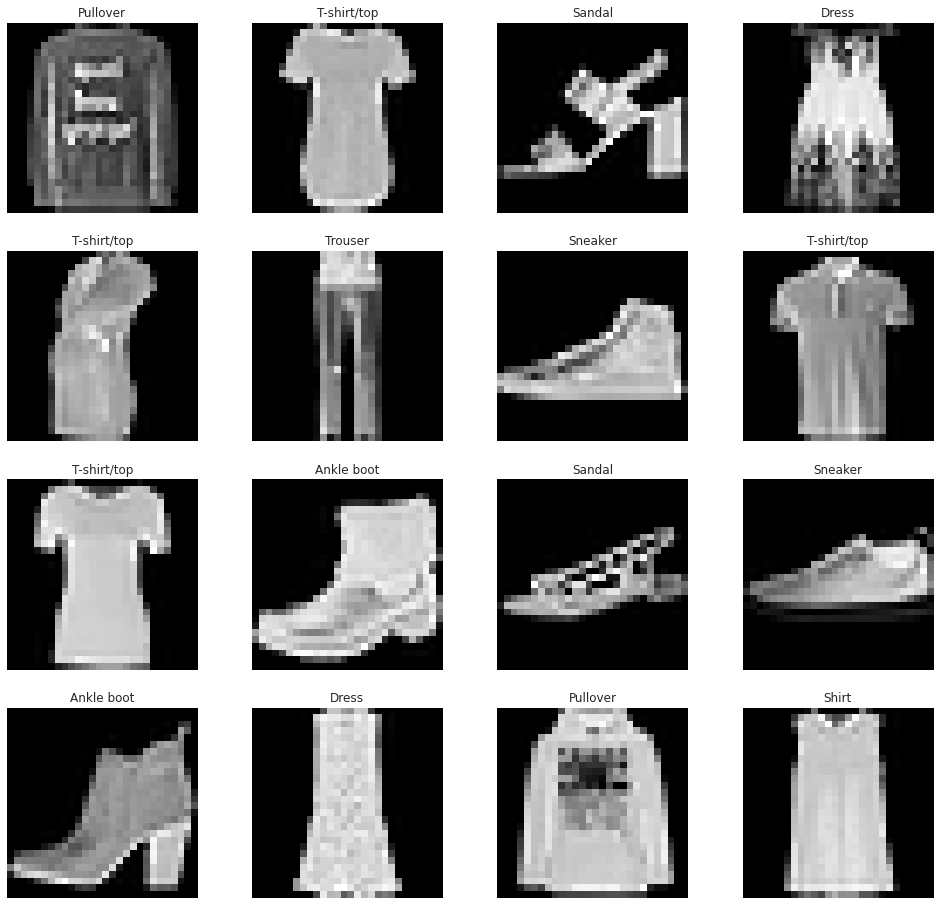

In [ ]:
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [ ]:
df['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [ ]:
seed = 66
np.random.seed(seed)

X = train.iloc[:,1:]
Y = train.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [ ]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

# reshape(examples, height, width, channels)
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

df_test.drop('label', axis=1, inplace=True)
df_test = df_test.values.reshape((-1, 28, 28, 1))

In [ ]:
#Normalization

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255

In [ ]:
#One hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_train.shape)
print(y_test.shape)

(54000, 10)
(6000, 10)


# Helper Functions

In [ ]:
def Datagen():
    datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
    datagen.fit(x_train)
    return datagen

In [ ]:
# function to pring accuracy and loss of a trained model
def AccuracyLoss(model):
  score = model.evaluate(x_test,y_test)
  print('Loss: {:.4f}'.format(score[0]))
  print('Accuracy: {:.4f}'.format(score[1]))

In [ ]:
# function for compiling the model
def optimise_compile(model,lossfunc):
  # Optimizer
  optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

  # Compiling the model
  model.compile(optimizer=optimizer, loss=lossfunc, metrics=["accuracy"])

In [ ]:
#Loss vs Epochs graphing function
def lve():
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Model Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()

In [ ]:
#Accuracy vs Epoch graphing function
def ave():
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()

#Sigmoid Activation

## Model no 1
### Desc
**Activation** : Sigmoid  
**Loss** : Categorical Cross Entropy  
**Number** of hidden layers : 1  
**nodes in hidden layer** : 16  


In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(10, activation='softmax'))

In [ ]:
optimise_compile(model2,"categorical_crossentropy")

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
batch_size = 128
epochs = 10
history = model2.fit_generator(Datagen().flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/10
421/421 - 49s - loss: 1.5338 - accuracy: 0.4451 - val_loss: 0.9354 - val_accuracy: 0.6452
Epoch 2/10
421/421 - 20s - loss: 1.0377 - accuracy: 0.6120 - val_loss: 0.7825 - val_accuracy: 0.7170
Epoch 3/10
421/421 - 19s - loss: 0.9619 - accuracy: 0.6403 - val_loss: 0.7701 - val_accuracy: 0.7128
Epoch 4/10
421/421 - 19s - loss: 0.9134 - accuracy: 0.6593 - val_loss: 0.7387 - val_accuracy: 0.7230
Epoch 5/10
421/421 - 20s - loss: 0.8802 - accuracy: 0.6747 - val_loss: 0.6672 - val_accuracy: 0.7650
Epoch 6/10
421/421 - 19s - loss: 0.8559 - accuracy: 0.6816 - val_loss: 0.6647 - val_accuracy: 0.7503
Epoch 7/10
421/421 - 19s - loss: 0.8179 - accuracy: 0.7000 - val_loss: 0.6321 - val_accuracy: 0.7758
Epoch 8/10
421/421 - 19s - loss: 0.8017 - accuracy: 0.7074 - val_loss: 0.6507 - val_accuracy: 0.7530
Epoch 9/10
421/421 - 19s - loss: 0.7862 - accuracy: 0.7123 - val_loss: 0.6294 - val_accuracy: 0.7658
Epoch 10/10
421/421 - 19s - loss: 0.7748 - accuracy: 0.7162 - val_loss: 0.6129 - val_accura

In [ ]:
AccuracyLoss(model2)

188/188 [==============================] - 1s 3ms/step - loss: 0.6129 - accuracy: 0.7793
Loss: 0.6129
Accuracy: 0.7793


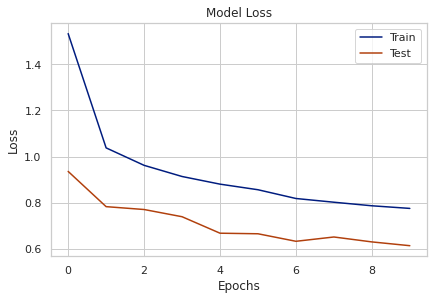

In [ ]:
lve()

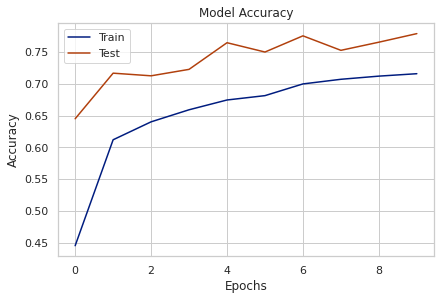

In [ ]:
ave()

## Model no 2
### Desc
**Activation** : Sigmoid  
**Loss** : KL Divergence  
**Number** of hidden layers : 1  
**nodes in hidden layer** : 16

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(10, activation='softmax'))

In [ ]:
optimise_compile(model2,"kullback_leibler_divergence")

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
batch_size = 128
epochs = 10
history = model2.fit_generator(Datagen().flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/10
421/421 - 22s - loss: 1.4822 - accuracy: 0.4593 - val_loss: 0.9388 - val_accuracy: 0.6587
Epoch 2/10
421/421 - 21s - loss: 1.0545 - accuracy: 0.5982 - val_loss: 0.8884 - val_accuracy: 0.6493
Epoch 3/10
421/421 - 21s - loss: 0.9684 - accuracy: 0.6357 - val_loss: 0.7430 - val_accuracy: 0.7348
Epoch 4/10
421/421 - 21s - loss: 0.9198 - accuracy: 0.6582 - val_loss: 0.7293 - val_accuracy: 0.7295
Epoch 5/10
421/421 - 21s - loss: 0.8794 - accuracy: 0.6762 - val_loss: 0.6816 - val_accuracy: 0.7535
Epoch 6/10
421/421 - 21s - loss: 0.8472 - accuracy: 0.6899 - val_loss: 0.6508 - val_accuracy: 0.7575
Epoch 7/10
421/421 - 21s - loss: 0.8234 - accuracy: 0.6990 - val_loss: 0.6490 - val_accuracy: 0.7660
Epoch 8/10
421/421 - 21s - loss: 0.7993 - accuracy: 0.7078 - val_loss: 0.6446 - val_accuracy: 0.7512
Epoch 9/10
421/421 - 21s - loss: 0.7835 - accuracy: 0.7149 - val_loss: 0.6213 - val_accuracy: 0.7662
Epoch 10/10
421/421 - 21s - loss: 0.7693 - accuracy: 0.7175 - val_loss: 0.5912 - val_accura

In [ ]:
AccuracyLoss(model2)

188/188 [==============================] - 1s 3ms/step - loss: 0.5912 - accuracy: 0.7888
Loss: 0.5912
Accuracy: 0.7888


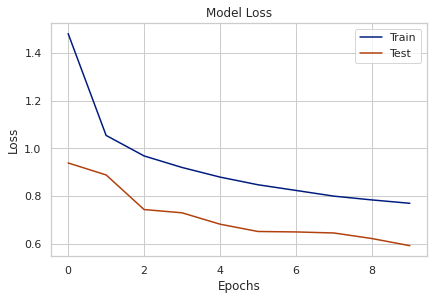

In [ ]:
lve()

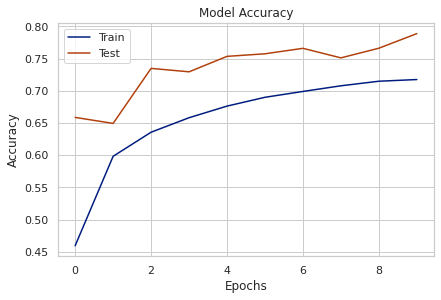

In [ ]:
ave()

## Model no 3
### Desc
**Activation** : Sigmoid  
**Loss** : Categorical Cross Entropy   
**Number** of hidden layers : 2  
**nodes in hidden layer** : 16  
**nodes in hidden layer 2** : 10

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters=16, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model3.add(Conv2D(filters=10, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))

model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(10, activation='softmax'))

In [ ]:
optimise_compile(model3,"categorical_crossentropy")

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
batch_size = 128
epochs = 10
history = model3.fit_generator(Datagen().flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/10
421/421 - 22s - loss: 1.5217 - accuracy: 0.4273 - val_loss: 0.8687 - val_accuracy: 0.6755
Epoch 2/10
421/421 - 21s - loss: 0.9756 - accuracy: 0.6276 - val_loss: 0.7881 - val_accuracy: 0.6960
Epoch 3/10
421/421 - 21s - loss: 0.8986 - accuracy: 0.6615 - val_loss: 0.7007 - val_accuracy: 0.7305
Epoch 4/10
421/421 - 21s - loss: 0.8574 - accuracy: 0.6811 - val_loss: 0.6700 - val_accuracy: 0.7615
Epoch 5/10
421/421 - 21s - loss: 0.8289 - accuracy: 0.6910 - val_loss: 0.6524 - val_accuracy: 0.7718
Epoch 6/10
421/421 - 21s - loss: 0.8068 - accuracy: 0.6968 - val_loss: 0.6335 - val_accuracy: 0.7818
Epoch 7/10
421/421 - 21s - loss: 0.7833 - accuracy: 0.7086 - val_loss: 0.6273 - val_accuracy: 0.7727
Epoch 8/10
421/421 - 21s - loss: 0.7666 - accuracy: 0.7153 - val_loss: 0.6089 - val_accuracy: 0.7823
Epoch 9/10
421/421 - 21s - loss: 0.7497 - accuracy: 0.7207 - val_loss: 0.5925 - val_accuracy: 0.7932
Epoch 10/10
421/421 - 21s - loss: 0.7357 - accuracy: 0.7286 - val_loss: 0.5714 - val_accura

In [ ]:
AccuracyLoss(model3)

188/188 [==============================] - 1s 4ms/step - loss: 0.5714 - accuracy: 0.7925
Loss: 0.5714
Accuracy: 0.7925


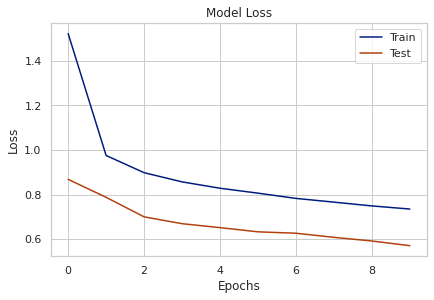

In [ ]:
lve()

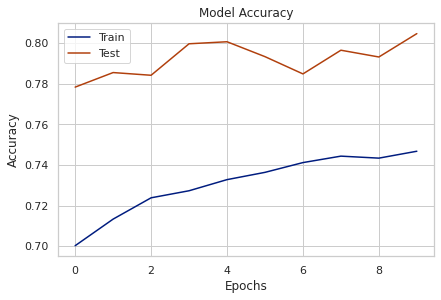

In [ ]:
ave()

## Model no 4
### desc
**Activation** : Sigmoid  
**Loss** : Categorical Cross Entropy   
**Number** of hidden layers : 2  
**nodes in hidden layer** : 16  
**nodes in hidden layer 2** : 32 

In [ ]:
model4 = Sequential()

model4.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model4.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(10, activation='softmax'))

In [ ]:
optimise_compile(model4,"categorical_crossentropy")

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
batch_size = 128
epochs = 10
history = model4.fit_generator(Datagen().flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/10
421/421 - 22s - loss: 0.8426 - accuracy: 0.6922 - val_loss: 0.5719 - val_accuracy: 0.7867
Epoch 2/10
421/421 - 21s - loss: 0.6196 - accuracy: 0.7737 - val_loss: 0.4975 - val_accuracy: 0.8170
Epoch 3/10
421/421 - 21s - loss: 0.5651 - accuracy: 0.7933 - val_loss: 0.4433 - val_accuracy: 0.8408
Epoch 4/10
421/421 - 21s - loss: 0.5271 - accuracy: 0.8079 - val_loss: 0.4261 - val_accuracy: 0.8475
Epoch 5/10
421/421 - 21s - loss: 0.5011 - accuracy: 0.8174 - val_loss: 0.4156 - val_accuracy: 0.8488
Epoch 6/10
421/421 - 21s - loss: 0.4818 - accuracy: 0.8278 - val_loss: 0.3916 - val_accuracy: 0.8575
Epoch 7/10
421/421 - 21s - loss: 0.4671 - accuracy: 0.8304 - val_loss: 0.4003 - val_accuracy: 0.8568
Epoch 8/10
421/421 - 21s - loss: 0.4568 - accuracy: 0.8349 - val_loss: 0.3697 - val_accuracy: 0.8655
Epoch 9/10
421/421 - 21s - loss: 0.4479 - accuracy: 0.8407 - val_loss: 0.3632 - val_accuracy: 0.8698
Epoch 10/10
421/421 - 21s - loss: 0.4356 - accuracy: 0.8420 - val_loss: 0.3830 - val_accura

In [ ]:
AccuracyLoss(model4)

188/188 [==============================] - 1s 4ms/step - loss: 0.3830 - accuracy: 0.8622
Loss: 0.3830
Accuracy: 0.8622


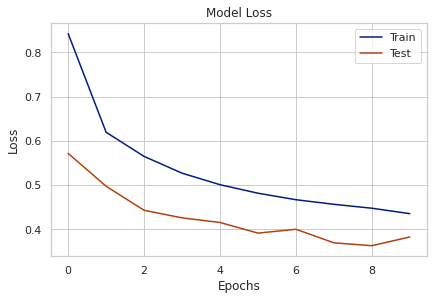

In [ ]:
lve()

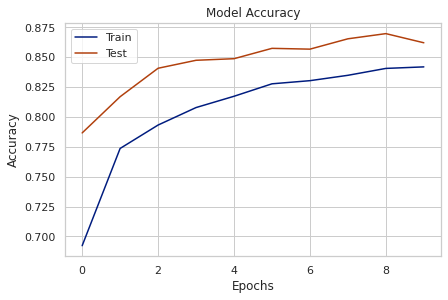

In [ ]:
ave()

## Model 5
### Desc
**Activation** : Sigmoid  
**Loss** : Categorical Crossentropy  
**Number of hidden layers** : 5  
**nodes in hidden layer** : 16, 32, 64, 128 + one 64 node dense 

In [ ]:
model5 = Sequential()

model5.add(Conv2D(filters=16, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model5.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))

model5.add(Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))

model5.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))

model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())

model5.add(Dense(64, activation='sigmoid'))

model5.add(Dense(10, activation='softmax'))

In [ ]:
optimise_compile(model5,"categorical_crossentropy")

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
batch_size = 128
epochs = 10
history = model5.fit_generator(Datagen().flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/10
421/421 - 25s - loss: 2.3234 - accuracy: 0.0987 - val_loss: 2.3042 - val_accuracy: 0.0997
Epoch 2/10
421/421 - 24s - loss: 2.3038 - accuracy: 0.1002 - val_loss: 2.3032 - val_accuracy: 0.1020
Epoch 3/10
421/421 - 24s - loss: 2.3039 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0987
Epoch 4/10
421/421 - 24s - loss: 2.3040 - accuracy: 0.0966 - val_loss: 2.3040 - val_accuracy: 0.0987
Epoch 5/10
421/421 - 24s - loss: 2.3037 - accuracy: 0.1007 - val_loss: 2.3031 - val_accuracy: 0.0990
Epoch 6/10
421/421 - 24s - loss: 2.3036 - accuracy: 0.0993 - val_loss: 2.3034 - val_accuracy: 0.0987
Epoch 7/10
421/421 - 24s - loss: 2.3034 - accuracy: 0.1007 - val_loss: 2.3032 - val_accuracy: 0.0967
Epoch 8/10
421/421 - 24s - loss: 2.3035 - accuracy: 0.0999 - val_loss: 2.3029 - val_accuracy: 0.1038
Epoch 9/10
421/421 - 24s - loss: 2.3034 - accuracy: 0.0995 - val_loss: 2.3035 - val_accuracy: 0.0990
Epoch 10/10
421/421 - 24s - loss: 2.3032 - accuracy: 0.1001 - val_loss: 2.3037 - val_accura

In [ ]:
AccuracyLoss(model5)

188/188 [==============================] - 1s 7ms/step - loss: 2.3037 - accuracy: 0.0967
Loss: 2.3037
Accuracy: 0.0967


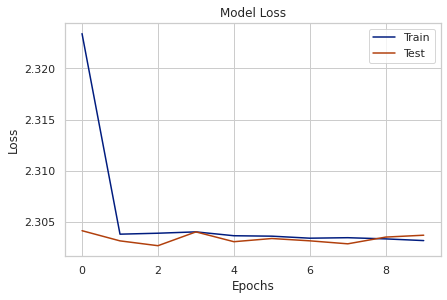

In [ ]:
lve()

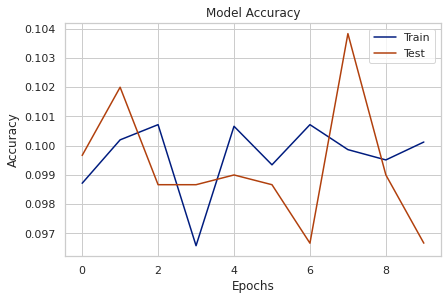

In [ ]:
ave()

## Model 6
### desc
**Activation** : Sigmoid  
**Loss** : Categorical cross-entropy   
**Number** of hidden layers : 6  
**nodes in hidden layer** : 16, 32, 64, 128 + 512 node dense + 128 node dense 

In [ ]:
model6 = Sequential()

model6.add(Conv2D(filters=16, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model6.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))

model6.add(Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))

model6.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))

model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())

model6.add(Dense(512, activation='sigmoid'))

model6.add(Dense(128, activation='sigmoid'))

model6.add(Dense(10, activation='softmax'))

In [ ]:
optimise_compile(model6,"categorical_crossentropy")

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
batch_size = 128
epochs = 20
# Fit the Model
history = model6.fit_generator(Datagen().flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/20
421/421 - 26s - loss: 2.3129 - accuracy: 0.1022 - val_loss: 2.3069 - val_accuracy: 0.1038
Epoch 2/20
421/421 - 25s - loss: 2.3063 - accuracy: 0.1006 - val_loss: 2.3037 - val_accuracy: 0.1048
Epoch 3/20
421/421 - 25s - loss: 2.3052 - accuracy: 0.1014 - val_loss: 2.3055 - val_accuracy: 0.1015
Epoch 4/20
421/421 - 25s - loss: 2.3055 - accuracy: 0.0997 - val_loss: 2.3045 - val_accuracy: 0.1038
Epoch 5/20
421/421 - 25s - loss: 2.3050 - accuracy: 0.0982 - val_loss: 2.3080 - val_accuracy: 0.0997
Epoch 6/20
421/421 - 25s - loss: 2.3050 - accuracy: 0.1001 - val_loss: 2.3034 - val_accuracy: 0.0987
Epoch 7/20
421/421 - 25s - loss: 2.3048 - accuracy: 0.0975 - val_loss: 2.3057 - val_accuracy: 0.1048
Epoch 8/20
421/421 - 25s - loss: 2.3044 - accuracy: 0.0976 - val_loss: 2.3040 - val_accuracy: 0.0967
Epoch 9/20
421/421 - 24s - loss: 2.3042 - accuracy: 0.1015 - val_loss: 2.3050 - val_accuracy: 0.1022
Epoch 10/20
421/421 - 25s - loss: 2.3037 - accuracy: 0.1016 - val_loss: 2.3045 - val_accura

In [ ]:
AccuracyLoss(model6)

188/188 [==============================] - 2s 9ms/step - loss: 2.3030 - accuracy: 0.1048
Loss: 2.3030
Accuracy: 0.1048


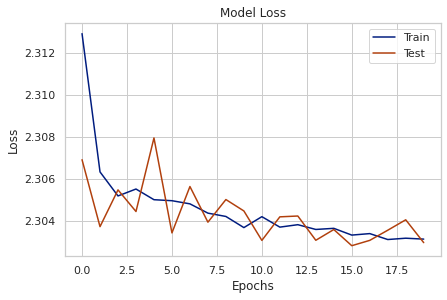

In [ ]:
lve()

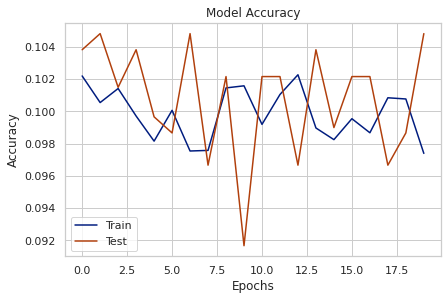

In [ ]:
ave()

#ReLu activation

## Model no. 1
#desc
**Activation** : ReLu  
**Loss** : Categorical Cross Entroyp  
**Number** of hidden layers : 1  
**nodes in hidden layer** : 16 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 10
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/10
421/421 - 32s - loss: 0.9452 - accuracy: 0.6634 - val_loss: 0.6360 - val_accuracy: 0.7562
Epoch 2/10
421/421 - 31s - loss: 0.6962 - accuracy: 0.7479 - val_loss: 0.5718 - val_accuracy: 0.7955
Epoch 3/10
421/421 - 31s - loss: 0.6393 - accuracy: 0.7673 - val_loss: 0.5027 - val_accuracy: 0.8202
Epoch 4/10
421/421 - 32s - loss: 0.6080 - accuracy: 0.7812 - val_loss: 0.4982 - val_accuracy: 0.8245
Epoch 5/10
421/421 - 32s - loss: 0.5884 - accuracy: 0.7878 - val_loss: 0.4866 - val_accuracy: 0.8255
Epoch 6/10
421/421 - 32s - loss: 0.5744 - accuracy: 0.7939 - val_loss: 0.4760 - val_accuracy: 0.8315
Epoch 7/10
421/421 - 31s - loss: 0.5659 - accuracy: 0.7942 - val_loss: 0.4628 - val_accuracy: 0.8378
Epoch 8/10
421/421 - 31s - loss: 0.5567 - accuracy: 0.7998 - val_loss: 0.4656 - val_accuracy: 0.8380
Epoch 9/10
421/421 - 31s - loss: 0.5505 - accuracy: 0.8016 - val_loss: 0.4583 - val_accuracy: 0.8372
Epoch 10/10
421/421 - 31s - loss: 0.5459 - accuracy: 0.8026 - val_loss: 0.4661 - val_accura

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 1s 5ms/step - loss: 0.4661 - accuracy: 0.8343
Loss: 0.4661
Accuracy: 0.8343


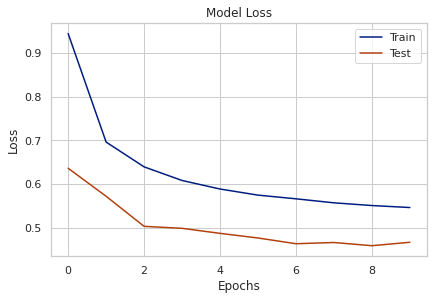

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

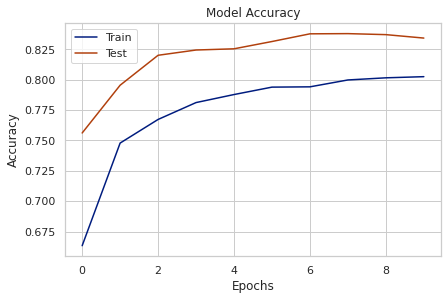

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Model no. 2
#desc
**Activation** : ReLu  
**Loss** : KL divergence  
**Number** of hidden layers : 2  
**nodes in hidden layer** : 16, 64 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="kullback_leibler_divergence", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 10
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/10
421/421 - 117s - loss: 0.7659 - accuracy: 0.7197 - val_loss: 0.4761 - val_accuracy: 0.8197
Epoch 2/10
421/421 - 116s - loss: 0.5577 - accuracy: 0.7984 - val_loss: 0.4336 - val_accuracy: 0.8397
Epoch 3/10
421/421 - 115s - loss: 0.5083 - accuracy: 0.8166 - val_loss: 0.4172 - val_accuracy: 0.8480
Epoch 4/10
421/421 - 115s - loss: 0.4811 - accuracy: 0.8271 - val_loss: 0.4006 - val_accuracy: 0.8542
Epoch 5/10
421/421 - 114s - loss: 0.4644 - accuracy: 0.8325 - val_loss: 0.4133 - val_accuracy: 0.8482
Epoch 6/10
421/421 - 114s - loss: 0.4467 - accuracy: 0.8381 - val_loss: 0.3629 - val_accuracy: 0.8705
Epoch 7/10
421/421 - 113s - loss: 0.4292 - accuracy: 0.8457 - val_loss: 0.3590 - val_accuracy: 0.8733
Epoch 8/10
421/421 - 114s - loss: 0.4219 - accuracy: 0.8479 - val_loss: 0.3506 - val_accuracy: 0.8738
Epoch 9/10
421/421 - 114s - loss: 0.4168 - accuracy: 0.8503 - val_loss: 0.3401 - val_accuracy: 0.8782
Epoch 10/10
421/421 - 113s - loss: 0.4062 - accuracy: 0.8528 - val_loss: 0.3373 - 

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 3s 17ms/step - loss: 0.3373 - accuracy: 0.8775
Loss: 0.3373
Accuracy: 0.8775


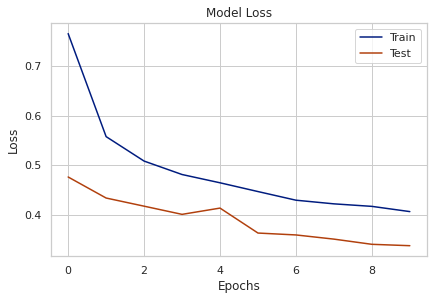

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

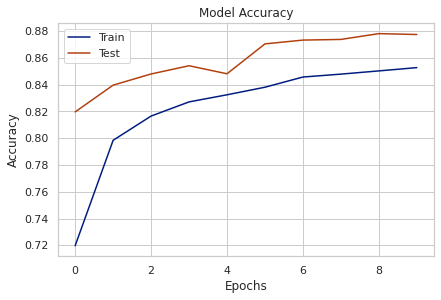

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Model no. 3
#desc
**Activation** : ReLu  
**Loss** : Categorical Cross-entropy  
**Number** of hidden layers : 4  
**nodes in hidden layer** : 16, 32, 64, 128 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 10
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/10
421/421 - 54s - loss: 0.6992 - accuracy: 0.7403 - val_loss: 0.4387 - val_accuracy: 0.8368
Epoch 2/10
421/421 - 23s - loss: 0.4798 - accuracy: 0.8239 - val_loss: 0.3911 - val_accuracy: 0.8560
Epoch 3/10
421/421 - 23s - loss: 0.4260 - accuracy: 0.8454 - val_loss: 0.3309 - val_accuracy: 0.8807
Epoch 4/10
421/421 - 23s - loss: 0.3935 - accuracy: 0.8565 - val_loss: 0.3324 - val_accuracy: 0.8820
Epoch 5/10
421/421 - 23s - loss: 0.3690 - accuracy: 0.8646 - val_loss: 0.3098 - val_accuracy: 0.8873
Epoch 6/10
421/421 - 24s - loss: 0.3526 - accuracy: 0.8722 - val_loss: 0.2826 - val_accuracy: 0.8997
Epoch 7/10
421/421 - 23s - loss: 0.3346 - accuracy: 0.8787 - val_loss: 0.2752 - val_accuracy: 0.9020
Epoch 8/10
421/421 - 23s - loss: 0.3264 - accuracy: 0.8823 - val_loss: 0.2838 - val_accuracy: 0.8953
Epoch 9/10
421/421 - 23s - loss: 0.3174 - accuracy: 0.8850 - val_loss: 0.2814 - val_accuracy: 0.8968
Epoch 10/10
421/421 - 23s - loss: 0.3029 - accuracy: 0.8905 - val_loss: 0.2598 - val_accura

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 1s 7ms/step - loss: 0.2598 - accuracy: 0.9063
Loss: 0.2598
Accuracy: 0.9063


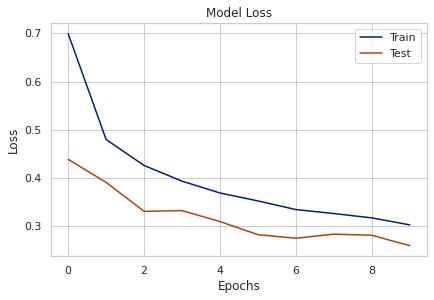

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

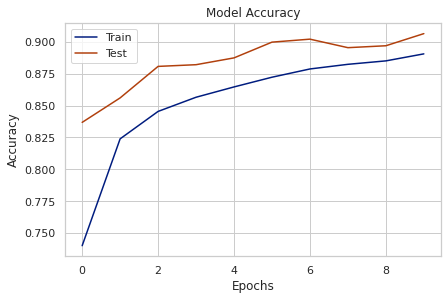

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Model no. 4
#desc
**Activation** : ReLu  
**Loss** : KL divergence 
**Number of hidden layers** : 5  
**nodes in hidden layer** : 16, 32, 64, 128 + one 64 node dense

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="kullback_leibler_divergence", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 10
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/10
421/421 - 28s - loss: 0.6835 - accuracy: 0.7425 - val_loss: 0.4041 - val_accuracy: 0.8510
Epoch 2/10
421/421 - 26s - loss: 0.4661 - accuracy: 0.8269 - val_loss: 0.3404 - val_accuracy: 0.8738
Epoch 3/10
421/421 - 26s - loss: 0.4066 - accuracy: 0.8501 - val_loss: 0.3133 - val_accuracy: 0.8850
Epoch 4/10
421/421 - 26s - loss: 0.3734 - accuracy: 0.8624 - val_loss: 0.2822 - val_accuracy: 0.9008
Epoch 5/10
421/421 - 26s - loss: 0.3456 - accuracy: 0.8723 - val_loss: 0.2842 - val_accuracy: 0.8927
Epoch 6/10
421/421 - 26s - loss: 0.3272 - accuracy: 0.8803 - val_loss: 0.2650 - val_accuracy: 0.9055
Epoch 7/10
421/421 - 26s - loss: 0.3129 - accuracy: 0.8849 - val_loss: 0.2718 - val_accuracy: 0.8987
Epoch 8/10
421/421 - 26s - loss: 0.2978 - accuracy: 0.8914 - val_loss: 0.2430 - val_accuracy: 0.9122
Epoch 9/10
421/421 - 26s - loss: 0.2888 - accuracy: 0.8943 - val_loss: 0.2543 - val_accuracy: 0.9040
Epoch 10/10
421/421 - 27s - loss: 0.2744 - accuracy: 0.8997 - val_loss: 0.2459 - val_accura

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 1s 6ms/step - loss: 0.2459 - accuracy: 0.9087
Loss: 0.2459
Accuracy: 0.9087


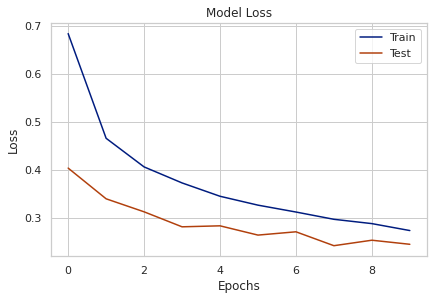

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

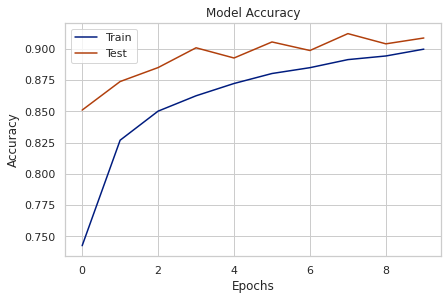

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Model no. 5
#desc
**Activation** : ReLu  
**Loss** : Categorical cross-entropy   
**Number** of hidden layers : 6  
**nodes in hidden layer** : 16, 32, 64, 128 + 512 node dense + 128 node dense 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 20
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/20
421/421 - 25s - loss: 0.6581 - accuracy: 0.7522 - val_loss: 0.3828 - val_accuracy: 0.8608
Epoch 2/20
421/421 - 24s - loss: 0.4338 - accuracy: 0.8387 - val_loss: 0.3354 - val_accuracy: 0.8730
Epoch 3/20
421/421 - 24s - loss: 0.3713 - accuracy: 0.8614 - val_loss: 0.2999 - val_accuracy: 0.8905
Epoch 4/20
421/421 - 25s - loss: 0.3382 - accuracy: 0.8748 - val_loss: 0.2735 - val_accuracy: 0.8965
Epoch 5/20
421/421 - 24s - loss: 0.3140 - accuracy: 0.8842 - val_loss: 0.2610 - val_accuracy: 0.8988
Epoch 6/20
421/421 - 25s - loss: 0.2885 - accuracy: 0.8941 - val_loss: 0.2472 - val_accuracy: 0.9085
Epoch 7/20
421/421 - 25s - loss: 0.2747 - accuracy: 0.8982 - val_loss: 0.2361 - val_accuracy: 0.9140
Epoch 8/20
421/421 - 25s - loss: 0.2602 - accuracy: 0.9032 - val_loss: 0.2391 - val_accuracy: 0.9068
Epoch 9/20
421/421 - 25s - loss: 0.2492 - accuracy: 0.9079 - val_loss: 0.2159 - val_accuracy: 0.9200
Epoch 10/20
421/421 - 25s - loss: 0.2412 - accuracy: 0.9105 - val_loss: 0.2224 - val_accura

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 1s 7ms/step - loss: 0.2056 - accuracy: 0.9272
Loss: 0.2056
Accuracy: 0.9272


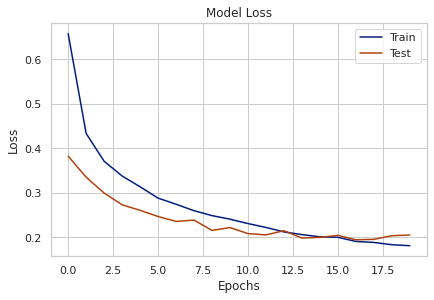

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

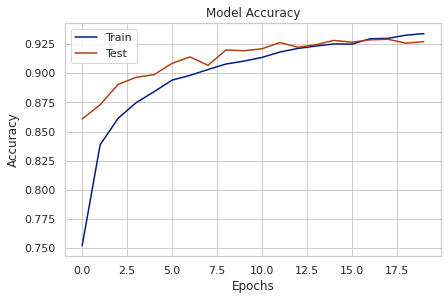

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

#Tanh activation

## Model no. 1
#desc
**Activation** : Tanh  
**Loss** : Categorical Cross Entroyp  
**Number** of hidden layers : 1  
**nodes in hidden layer** : 16 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 10
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/10
421/421 - 32s - loss: 0.9452 - accuracy: 0.6634 - val_loss: 0.6360 - val_accuracy: 0.7562
Epoch 2/10
421/421 - 31s - loss: 0.6962 - accuracy: 0.7479 - val_loss: 0.5718 - val_accuracy: 0.7955
Epoch 3/10
421/421 - 31s - loss: 0.6393 - accuracy: 0.7673 - val_loss: 0.5027 - val_accuracy: 0.8202
Epoch 4/10
421/421 - 32s - loss: 0.6080 - accuracy: 0.7812 - val_loss: 0.4982 - val_accuracy: 0.8245
Epoch 5/10
421/421 - 32s - loss: 0.5884 - accuracy: 0.7878 - val_loss: 0.4866 - val_accuracy: 0.8255
Epoch 6/10
421/421 - 32s - loss: 0.5744 - accuracy: 0.7939 - val_loss: 0.4760 - val_accuracy: 0.8315
Epoch 7/10
421/421 - 31s - loss: 0.5659 - accuracy: 0.7942 - val_loss: 0.4628 - val_accuracy: 0.8378
Epoch 8/10
421/421 - 31s - loss: 0.5567 - accuracy: 0.7998 - val_loss: 0.4656 - val_accuracy: 0.8380
Epoch 9/10
421/421 - 31s - loss: 0.5505 - accuracy: 0.8016 - val_loss: 0.4583 - val_accuracy: 0.8372
Epoch 10/10
421/421 - 31s - loss: 0.5459 - accuracy: 0.8026 - val_loss: 0.4661 - val_accura

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 1s 5ms/step - loss: 0.4661 - accuracy: 0.8343
Loss: 0.4661
Accuracy: 0.8343


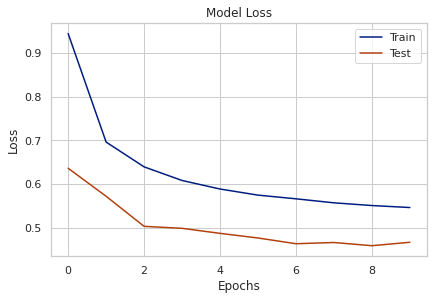

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

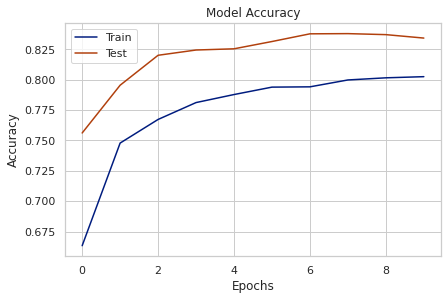

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Model no. 2
#desc
**Activation** : Tanh  
**Loss** : KL divergence  
**Number** of hidden layers : 2  
**nodes in hidden layer** : 16, 64 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="kullback_leibler_divergence", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 10
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/10
421/421 - 117s - loss: 0.7659 - accuracy: 0.7197 - val_loss: 0.4761 - val_accuracy: 0.8197
Epoch 2/10
421/421 - 116s - loss: 0.5577 - accuracy: 0.7984 - val_loss: 0.4336 - val_accuracy: 0.8397
Epoch 3/10
421/421 - 115s - loss: 0.5083 - accuracy: 0.8166 - val_loss: 0.4172 - val_accuracy: 0.8480
Epoch 4/10
421/421 - 115s - loss: 0.4811 - accuracy: 0.8271 - val_loss: 0.4006 - val_accuracy: 0.8542
Epoch 5/10
421/421 - 114s - loss: 0.4644 - accuracy: 0.8325 - val_loss: 0.4133 - val_accuracy: 0.8482
Epoch 6/10
421/421 - 114s - loss: 0.4467 - accuracy: 0.8381 - val_loss: 0.3629 - val_accuracy: 0.8705
Epoch 7/10
421/421 - 113s - loss: 0.4292 - accuracy: 0.8457 - val_loss: 0.3590 - val_accuracy: 0.8733
Epoch 8/10
421/421 - 114s - loss: 0.4219 - accuracy: 0.8479 - val_loss: 0.3506 - val_accuracy: 0.8738
Epoch 9/10
421/421 - 114s - loss: 0.4168 - accuracy: 0.8503 - val_loss: 0.3401 - val_accuracy: 0.8782
Epoch 10/10
421/421 - 113s - loss: 0.4062 - accuracy: 0.8528 - val_loss: 0.3373 - 

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 3s 17ms/step - loss: 0.3373 - accuracy: 0.8775
Loss: 0.3373
Accuracy: 0.8775


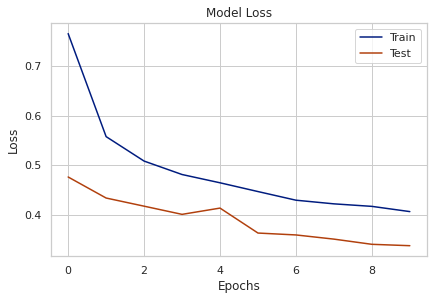

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

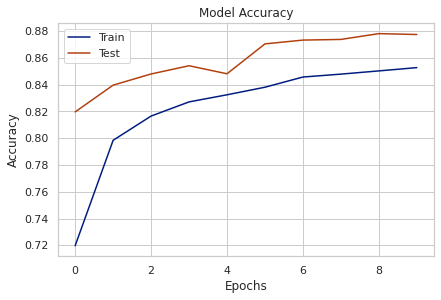

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Model no. 3
#desc
**Activation** : Tanh  
**Loss** : Categorical Cross-entropy  
**Number** of hidden layers : 4  
**nodes in hidden layer** : 16, 32, 64, 128 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 10
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/10
421/421 - 54s - loss: 0.6992 - accuracy: 0.7403 - val_loss: 0.4387 - val_accuracy: 0.8368
Epoch 2/10
421/421 - 23s - loss: 0.4798 - accuracy: 0.8239 - val_loss: 0.3911 - val_accuracy: 0.8560
Epoch 3/10
421/421 - 23s - loss: 0.4260 - accuracy: 0.8454 - val_loss: 0.3309 - val_accuracy: 0.8807
Epoch 4/10
421/421 - 23s - loss: 0.3935 - accuracy: 0.8565 - val_loss: 0.3324 - val_accuracy: 0.8820
Epoch 5/10
421/421 - 23s - loss: 0.3690 - accuracy: 0.8646 - val_loss: 0.3098 - val_accuracy: 0.8873
Epoch 6/10
421/421 - 24s - loss: 0.3526 - accuracy: 0.8722 - val_loss: 0.2826 - val_accuracy: 0.8997
Epoch 7/10
421/421 - 23s - loss: 0.3346 - accuracy: 0.8787 - val_loss: 0.2752 - val_accuracy: 0.9020
Epoch 8/10
421/421 - 23s - loss: 0.3264 - accuracy: 0.8823 - val_loss: 0.2838 - val_accuracy: 0.8953
Epoch 9/10
421/421 - 23s - loss: 0.3174 - accuracy: 0.8850 - val_loss: 0.2814 - val_accuracy: 0.8968
Epoch 10/10
421/421 - 23s - loss: 0.3029 - accuracy: 0.8905 - val_loss: 0.2598 - val_accura

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 1s 7ms/step - loss: 0.2598 - accuracy: 0.9063
Loss: 0.2598
Accuracy: 0.9063


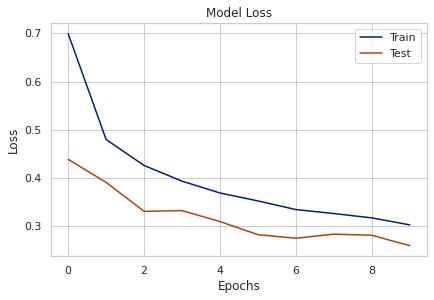

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

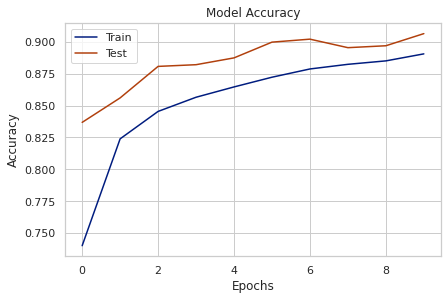

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Model no. 4
#desc
**Activation** : Tanh + ReLu  
**Loss** : KL divergence 
**Number of hidden layers** : 5  
**nodes in hidden layer** : 16, 32, 64, 128 + one 64 node dense

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="kullback_leibler_divergence", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 10
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/10
421/421 - 28s - loss: 0.6835 - accuracy: 0.7425 - val_loss: 0.4041 - val_accuracy: 0.8510
Epoch 2/10
421/421 - 26s - loss: 0.4661 - accuracy: 0.8269 - val_loss: 0.3404 - val_accuracy: 0.8738
Epoch 3/10
421/421 - 26s - loss: 0.4066 - accuracy: 0.8501 - val_loss: 0.3133 - val_accuracy: 0.8850
Epoch 4/10
421/421 - 26s - loss: 0.3734 - accuracy: 0.8624 - val_loss: 0.2822 - val_accuracy: 0.9008
Epoch 5/10
421/421 - 26s - loss: 0.3456 - accuracy: 0.8723 - val_loss: 0.2842 - val_accuracy: 0.8927
Epoch 6/10
421/421 - 26s - loss: 0.3272 - accuracy: 0.8803 - val_loss: 0.2650 - val_accuracy: 0.9055
Epoch 7/10
421/421 - 26s - loss: 0.3129 - accuracy: 0.8849 - val_loss: 0.2718 - val_accuracy: 0.8987
Epoch 8/10
421/421 - 26s - loss: 0.2978 - accuracy: 0.8914 - val_loss: 0.2430 - val_accuracy: 0.9122
Epoch 9/10
421/421 - 26s - loss: 0.2888 - accuracy: 0.8943 - val_loss: 0.2543 - val_accuracy: 0.9040
Epoch 10/10
421/421 - 27s - loss: 0.2744 - accuracy: 0.8997 - val_loss: 0.2459 - val_accura

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 1s 6ms/step - loss: 0.2459 - accuracy: 0.9087
Loss: 0.2459
Accuracy: 0.9087


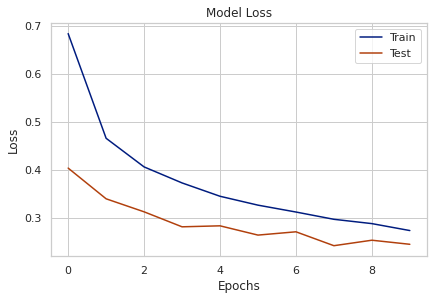

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

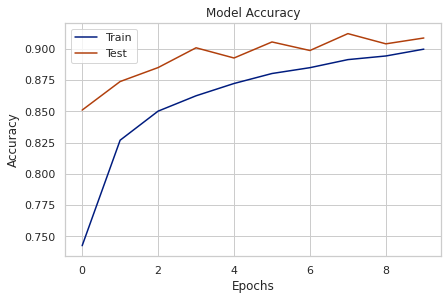

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## Model no. 5
#desc
**Activation** : Tanh + ReLu  
**Loss** : Categorical cross-entropy   
**Number** of hidden layers : 6  
**nodes in hidden layer** : 16, 32, 64, 128 + 512 node dense + 128 node dense 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [ ]:
batch_size = 128
epochs = 20
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])


Epoch 1/20
421/421 - 25s - loss: 0.6581 - accuracy: 0.7522 - val_loss: 0.3828 - val_accuracy: 0.8608
Epoch 2/20
421/421 - 24s - loss: 0.4338 - accuracy: 0.8387 - val_loss: 0.3354 - val_accuracy: 0.8730
Epoch 3/20
421/421 - 24s - loss: 0.3713 - accuracy: 0.8614 - val_loss: 0.2999 - val_accuracy: 0.8905
Epoch 4/20
421/421 - 25s - loss: 0.3382 - accuracy: 0.8748 - val_loss: 0.2735 - val_accuracy: 0.8965
Epoch 5/20
421/421 - 24s - loss: 0.3140 - accuracy: 0.8842 - val_loss: 0.2610 - val_accuracy: 0.8988
Epoch 6/20
421/421 - 25s - loss: 0.2885 - accuracy: 0.8941 - val_loss: 0.2472 - val_accuracy: 0.9085
Epoch 7/20
421/421 - 25s - loss: 0.2747 - accuracy: 0.8982 - val_loss: 0.2361 - val_accuracy: 0.9140
Epoch 8/20
421/421 - 25s - loss: 0.2602 - accuracy: 0.9032 - val_loss: 0.2391 - val_accuracy: 0.9068
Epoch 9/20
421/421 - 25s - loss: 0.2492 - accuracy: 0.9079 - val_loss: 0.2159 - val_accuracy: 0.9200
Epoch 10/20
421/421 - 25s - loss: 0.2412 - accuracy: 0.9105 - val_loss: 0.2224 - val_accura

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 1s 7ms/step - loss: 0.2056 - accuracy: 0.9272
Loss: 0.2056
Accuracy: 0.9272


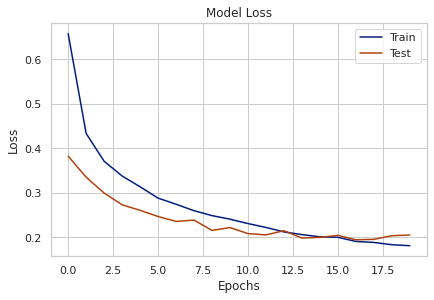

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

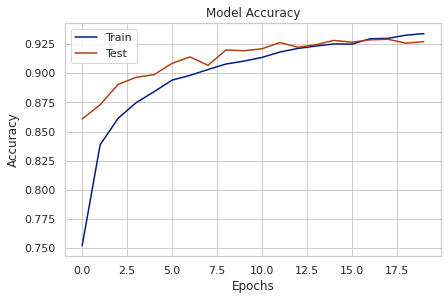

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()